1) Faça o módulo do Kaggle Intro to Machine Learning:
Comprove a finalização do módulo com um print que contenha data e identificação do aluno.


Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

2) Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

In [35]:
!kaggle datasets download -d rajyellow46/wine-quality --unzip
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("/content/winequalityN.csv")
df.head()

df_parte1=df.loc[df.type=='white']
df_parte1['opinion'] = df_parte1['quality'].apply(lambda x:0 if x<=5 else 1)

df_parte1 = df_parte1.drop(columns=['quality'])
df_parte1

Dataset URL: https://www.kaggle.com/datasets/rajyellow46/wine-quality
License(s): other
  0% 0.00/98.0k [00:00<?, ?B/s]
100% 98.0k/98.0k [00:00<00:00, 79.2MB/s]


<ipython-input-35-2dcd37be8a7e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parte1['opinion'] = df_parte1['quality'].apply(lambda x:0 if x<=5 else 1)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [36]:

from sklearn.svm import SVC

accuracy_scores_svm = []
precision_scores_svm = []
recall_scores_svm = []
f1_scores_svm = []

# Validacao Cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Setting random_state for reproducibility

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Instanciando e treinando o modelo
    model = SVC(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Resultados
    accuracy_scores_svm.append(accuracy_score(y_test, y_pred))
    precision_scores_svm.append(precision_score(y_test, y_pred))
    recall_scores_svm.append(recall_score(y_test, y_pred))
    f1_scores_svm.append(f1_score(y_test, y_pred))

# Resultados médios dos folds
print("\nSVM Classifier:")
print("Accuracy:  Mean =", round(np.mean(accuracy_scores_svm),2), ", Std =", round(np.std(accuracy_scores_svm),3))
print("Precision: Mean =", round(np.mean(precision_scores_svm),2), ", Std =",round(np.std(precision_scores_svm),3))
print("Recall:    Mean =", round(np.mean(recall_scores_svm),2), ", Std =", round(np.std(recall_scores_svm),3))
print("F1-score:  Mean =", round(np.mean(f1_scores_svm),2), ", Std =", round(np.std(f1_scores_svm),4))


SVM Classifier:
Accuracy:  Mean = 0.67 , Std = 0.002
Precision: Mean = 0.67 , Std = 0.001
Recall:    Mean = 1.0 , Std = 0.002
F1-score:  Mean = 0.8 , Std = 0.0013


3) Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

In [37]:
df_parte1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


RESPOSTA: Todas as variáveis são contínuas, com exceção da Opinião, que é discreta (booleana)

---



Com a base escolhida:


4.1) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

RESPOSTA:




1) Pré-processamento dos dados (substituição de nulos pelas respecitvas medianas das colunas
2) Criação de variaves dummies para as colunas categóricas (desde que selecione somente as categorias relevantes, ou então poderia tornar o modelo mais ineficiente) 3) Remoção de outliers se necessário
4) Remoção de variáveis com alta corrlação (pela matriz de correlação, por exemplo)
5) Normalização, caso necessário (para dar igualdade ao tratamento das variáveis)



In [38]:
df_parte1.fillna(df_parte1.median(numeric_only=True),inplace=True)

df_parte1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,white,6.5,0.26,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


4.2) Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.


In [45]:
X = df_parte1.drop(['type', 'opinion'], axis=1)
y = df_parte1['opinion']

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Validacao Cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Setting random_state for reproducibility

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Instanciando e treinando o modelo
    model_reg = LogisticRegression(max_iter=2000)
    model_reg.fit(X_train, y_train)

    # Predict
    y_pred = model_reg.predict(X_test)

    # Resultados
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Resultados médios dos folds
print("Accuracy:  Mean =", round(np.mean(accuracy_scores),2), ", Std =", round(np.std(accuracy_scores),3))
print("Precision: Mean =", round(np.mean(precision_scores),2), ", Std =",round(np.std(precision_scores),3))
print("Recall:    Mean =", round(np.mean(recall_scores),2), ", Std =", round(np.std(recall_scores),3))
print("F1-score:  Mean =", round(np.mean(f1_scores),2), ", Std =", round(np.std(f1_scores),4))



Accuracy:  Mean = 0.75 , Std = 0.015
Precision: Mean = 0.77 , Std = 0.016
Recall:    Mean = 0.88 , Std = 0.018
F1-score:  Mean = 0.82 , Std = 0.0097


Interpretação dos Resultados:

O Recall, ou True Positive Rate (proporção de valores realmente positivo sobre os classificados corretamente como positivos) é métrica mais alta. É um bom caso de uso quando se quer evitar falsos negativos ou bases desbalanceadas. Apesar disso, F1 score também está muito bom.

4.3) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.


In [41]:
from sklearn.tree import DecisionTreeClassifier

accuracy_scores_dt = []
precision_scores_dt = []
recall_scores_dt = []
f1_scores_dt = []

# Validacao Cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Setting random_state for reproducibility

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Instanciando e treinando o modelo
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Resultados
    accuracy_scores_dt.append(accuracy_score(y_test, y_pred))
    precision_scores_dt.append(precision_score(y_test, y_pred))
    recall_scores_dt.append(recall_score(y_test, y_pred))
    f1_scores_dt.append(f1_score(y_test, y_pred))

# Resultados médios dos folds
print("\nDecision Tree Classifier:")
print("Accuracy:  Mean =", round(np.mean(accuracy_scores_dt),2), ", Std =", round(np.std(accuracy_scores_dt),3))
print("Precision: Mean =", round(np.mean(precision_scores_dt),2), ", Std =",round(np.std(precision_scores_dt),3))
print("Recall:    Mean =", round(np.mean(recall_scores_dt),2), ", Std =", round(np.std(recall_scores_dt),3))
print("F1-score:  Mean =", round(np.mean(f1_scores_dt),2), ", Std =", round(np.std(f1_scores_dt),4))



Decision Tree Classifier:
Accuracy:  Mean = 0.8 , Std = 0.018
Precision: Mean = 0.85 , Std = 0.016
Recall:    Mean = 0.84 , Std = 0.024
F1-score:  Mean = 0.85 , Std = 0.0144


Interpretação dos Resultados:

As métricas estão muito boas e mais equilibradas, sendo um bom modelo em varios casos de uso.

4.4) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos;
ii. a média e desvio da precisão dos modelos obtidos;
iii. a média e desvio da recall dos modelos obtidos;
iv. a média e desvio do f1-score dos modelos obtidos.

---




In [42]:
from sklearn.svm import SVC

accuracy_scores_svm = []
precision_scores_svm = []
recall_scores_svm = []
f1_scores_svm = []

# Validacao Cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Setting random_state for reproducibility

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Instanciando e treinando o modelo
    model = SVC(random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Resultados
    accuracy_scores_svm.append(accuracy_score(y_test, y_pred))
    precision_scores_svm.append(precision_score(y_test, y_pred))
    recall_scores_svm.append(recall_score(y_test, y_pred))
    f1_scores_svm.append(f1_score(y_test, y_pred))

# Resultados médios dos folds
print("\nSVM Classifier:")
print("Accuracy:  Mean =", round(np.mean(accuracy_scores_svm),2), ", Std =", round(np.std(accuracy_scores_svm),3))
print("Precision: Mean =", round(np.mean(precision_scores_svm),2), ", Std =",round(np.std(precision_scores_svm),3))
print("Recall:    Mean =", round(np.mean(recall_scores_svm),2), ", Std =", round(np.std(recall_scores_svm),3))
print("F1-score:  Mean =", round(np.mean(f1_scores_svm),2), ", Std =", round(np.std(f1_scores_svm),4))



SVM Classifier:
Accuracy:  Mean = 0.67 , Std = 0.002
Precision: Mean = 0.67 , Std = 0.001
Recall:    Mean = 1.0 , Std = 0.002
F1-score:  Mean = 0.8 , Std = 0.0013


Interpretação dos Resultados:
Neste caso, tivemos um perfeito recall, ótimo modelo para se evitar falsos negativos.




5) Em relação à questão anterior, qual o modelo deveria ser escolhido para uma eventual operação. Responda essa questão mostrando a comparação de todos os modelos, usando um gráfico mostrando a curva ROC média para cada um dos gráficos e justifique.



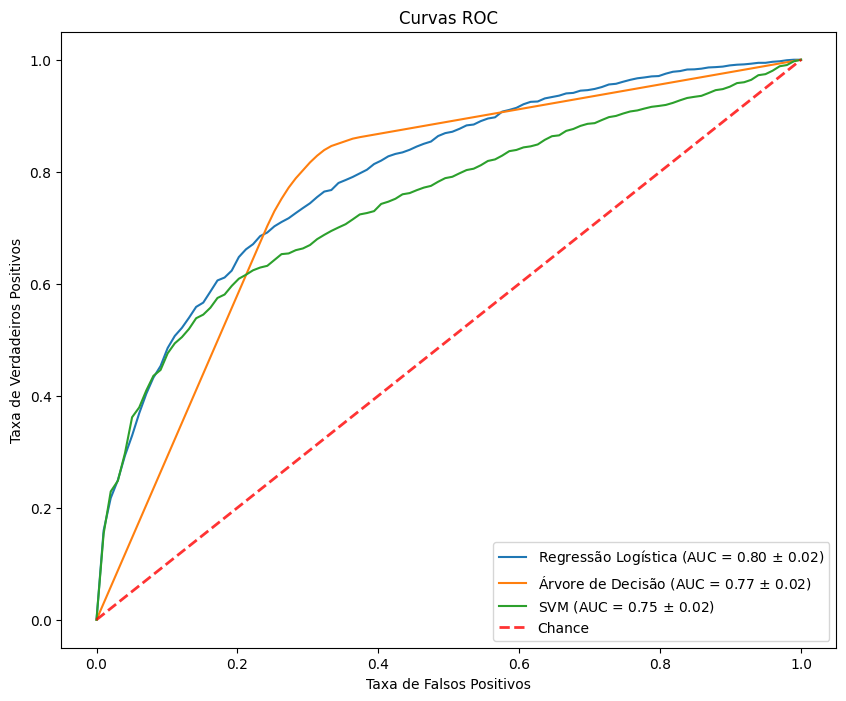

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular as curvas ROC para cada modelo
def plot_roc_curves(models, model_names, X, y):
    fig, ax = plt.subplots(figsize=(10, 8))

    for model, model_name in zip(models, model_names):
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train, y_train)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        ax.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})')

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
    ax.set_xlabel('Taxa de Falsos Positivos')
    ax.set_ylabel('Taxa de Verdadeiros Positivos')
    ax.set_title('Curvas ROC')
    ax.legend(loc='lower right')
    plt.show()


# Instanciar os modelos
models = [LogisticRegression(max_iter=2000), DecisionTreeClassifier(random_state=42), SVC(random_state=42, probability=True)]
model_names = ['Regressão Logística', 'Árvore de Decisão', 'SVM']

plot_roc_curves(models, model_names, X, y)




Interpretação dos Resultados:
O modelo de Regressao demonstrou ser o melhor pois, tem o maior AUC e menor desvio padrão. Poderiamos priorizar baixa taxa de falsos negativos , para se evitarem altos custos de melhoria dos processos produtivos do vinho, porém o modelo de regressao consegue ser melhor que o SVM em grande maioria dos casos.


6) Com a escolha do melhor modelo, use os dados de vinho tinto, presentes na base original e faça a inferência (não é para treinar novamente!!!) para saber quantos vinhos são bons ou ruins. Utilize o mesmo critério utilizado com os vinhos brancos, para comparar o desempenho do modelo. Ele funciona da mesma forma para essa nova base? Justifique.


In [46]:

# Criando o subset com os vinhos tintos
df_parte2 = df.loc[df.type == 'red']
df_parte2['opinion'] = df_parte2['quality'].apply(lambda x: 0 if x <= 5 else 1)
df_parte2 = df_parte2.drop(columns=['quality'])
df_parte2.fillna(df_parte2.median(numeric_only=True), inplace=True)

# Separando as features (X) e a variável target (y)
X_red = df_parte2.drop(['type', 'opinion'], axis=1)
y_red = df_parte2['opinion']

# Usando o melhor modelo (Regressão Logística) treinado anteriormente nos dados de vinho branco para prever a qualidade dos vinhos tintos
y_pred_red = model_reg.predict(X_red)

# Calculando as métricas de avaliação para os vinhos tintos
accuracy_red = accuracy_score(y_red, y_pred_red)
precision_red = precision_score(y_red, y_pred_red)
recall_red = recall_score(y_red, y_pred_red)
f1_red = f1_score(y_red, y_pred_red)

print("\nResultados para Vinhos Tintos (usando o modelo treinado com vinhos brancos):")
print(f"Acurácia: {accuracy_red:.2f}")
print(f"Precisão: {precision_red:.2f}")
print(f"Recall: {recall_red:.2f}")
print(f"F1-score: {f1_red:.2f}")

# Comparação e justificativa
print("\nComparação de Desempenho:")
print(f"O modelo treinado com vinhos brancos apresentou uma acurácia de {np.mean(accuracy_scores):.2f} para vinhos brancos e {accuracy_red:.2f} para vinhos tintos.")



Resultados para Vinhos Tintos (usando o modelo treinado com vinhos brancos):
Acurácia: 0.68
Precisão: 0.85
Recall: 0.48
F1-score: 0.62

Comparação de Desempenho:
O modelo treinado com vinhos brancos apresentou uma acurácia de 0.75 para vinhos brancos e 0.68 para vinhos tintos.


<ipython-input-46-640b84ad021a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parte2['opinion'] = df_parte2['quality'].apply(lambda x: 0 if x <= 5 else 1)


Interpretação dos resultados:
O desempenho do modelo foi bem inferior no caso de vinhos tintos, o que sugere que devemos usar modelos proprios para cada vinho. Não recomderia usarmos Reg Logistica pois a taxa de recall é muito baixa e poderia levar a altos custos caso se mudasse a produção por isso.

7) GitHub

https://github.com/dcazevedo1/infnet.git
